In [1]:
import numpy as np


In [2]:
BN = np.array([[-0.87097, 0.45161, 0.19355],[-0.19355, -0.67742, 0.70968],[0.45161, 0.58065, 0.67742]])

In [3]:
wBN = np.array([[0.1],[0.2],[0.3]])

In [11]:
skew = np.cross(wBN.transpose(),np.eye(3))

In [12]:
np.dot(skew,BN)

array([[-0.148387, -0.319356,  0.07742 ],
       [ 0.306452, -0.077418,  0.009677],
       [-0.154839,  0.158064, -0.032258]])

# Quaternion to DCM (spacecraft-dynamics-kinematic course at coursera)

In [2]:
def QtoDCM(q):
    q0 = q[0]
    q1 = q[1]
    q2 = q[2]
    q3 = q[3]
    return np.array([[q0**2 + q1**2 - q2**2 - q3**2,       2 * (q1 * q2 + q0 * q3),       2 * (q1 * q3 - q0 * q2)],
                     [      2 * (q1 * q2 - q0 * q3), q0**2 - q1**2 + q2**2 - q3**2,       2 * (q2 * q3 + q0 * q1)],
                     [      2 * (q1 * q3 + q0 * q2),       2 * (q2 * q3 - q0 * q1), q0**2 - q1**2 - q2**2 + q3**2]],dtype=np.float64)

In [3]:
q = np.array([0.235702, 0.471405, -0.471405, 0.707107])

In [4]:
QtoDCM(q)

array([[-0.44444488, -0.11111228,  0.88888975],
       [-0.77777842, -0.44444488, -0.44444535],
       [ 0.44444535, -0.88888975,  0.11111039]])

In [5]:
R = np.array([[-0.529403, -0.474115,  0.703525],
              [-0.467056, -0.529403, -0.708231],
              [ 0.708231, -0.703525, 0.0588291]])

In [25]:
def DCMtoQ(R):
    #q  =  np.empty((4, ))
    q0 = 0.5 * np.sqrt(R.trace() + 1)
    q1 = (R[1,2] - R[2,1])/(4 * q0)
    q2 = (R[2,0] - R[0,2])/(4 * q0)
    q3 = (R[0,1] - R[1,0])/(4 * q0)
    return np.array([q0, q1, q2, q3], dtype=np.float64)

In [16]:
DCMtoQ(R)

array([ 0.00240312, -0.48957129,  0.48957129, -0.73435693])

In [18]:
DCMtoQ(R)

array([-0.00240312,  0.48957129, -0.48957129,  0.73435693])

In [2]:
import transformations 

In [30]:
R = transformations.euler_matrix(np.deg2rad(20), np.deg2rad(10), np.deg2rad(-10), axes='rzyx')
R = R[:3, :3]

In [31]:
DCMtoQ(R)

array([ 0.97600798,  0.10058188, -0.07042819, -0.17980985])

In [40]:
QBN = np.array([0.774597, 0.258199, 0.516398, 0.258199])
QBN = QBN/np.linalg.norm(QBN)
QFB = np.array([0.359211, 0.898027, 0.179605, 0.179605])
QFB = QFB/np.linalg.norm(QFB)

In [47]:
QFN = DCMtoQ(np.dot(QtoDCM(QFB), QtoDCM(QBN)))

In [48]:
QBN = np.array([-0.377964,0.755929,0.377964,0.377964])
QBN = QBN/np.linalg.norm(QBN)
QFN = np.array([0.359211,0.898027,0.179605,0.179605])
QFN = QFN/np.linalg.norm(QFN)

In [49]:
QFB = DCMtoQ( np.dot( QtoDCM( QFB ), np.transpose( QtoDCM( QBN ) ) ) )

In [50]:
QFB

array([  6.78844289e-01,  -6.10959902e-01,  -4.07306309e-01,
         1.98359004e-07])

# Book 3.32 

In [104]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [105]:
import scipy.integrate as integrate

In [106]:
matplotlib.rcParams['figure.figsize'] = (18,10)

In [108]:
# 10 = 0.5 * 20
def rot(y, t):
    q0, q1, q2, q3 = y
    dydt =  [np.deg2rad(10) * (                      - np.sin(0.1 * t) * q1 -            0.01 * q2 - np.cos(0.1 * t) * q3),
             np.deg2rad(10) * ( np.sin(0.1 * t) * q0                        + np.cos(0.1 * t) * q2 -            0.01 * q3),
             np.deg2rad(10) * (            0.01 * q0 - np.cos(0.1 * t) * q1                        + np.sin(0.1 * t) * q3),
             np.deg2rad(10) * ( np.cos(0.1 * t) * q0 +            0.01 * q1 - np.sin(0.1 * t) * q2                        )]
    return dydt

In [109]:
y0 = [0.408248, 0., 0.408248, 0.816497]

In [113]:
t = np.linspace(0, 1000, 350)

In [114]:
sol = integrate.odeint(rot, y0, t)

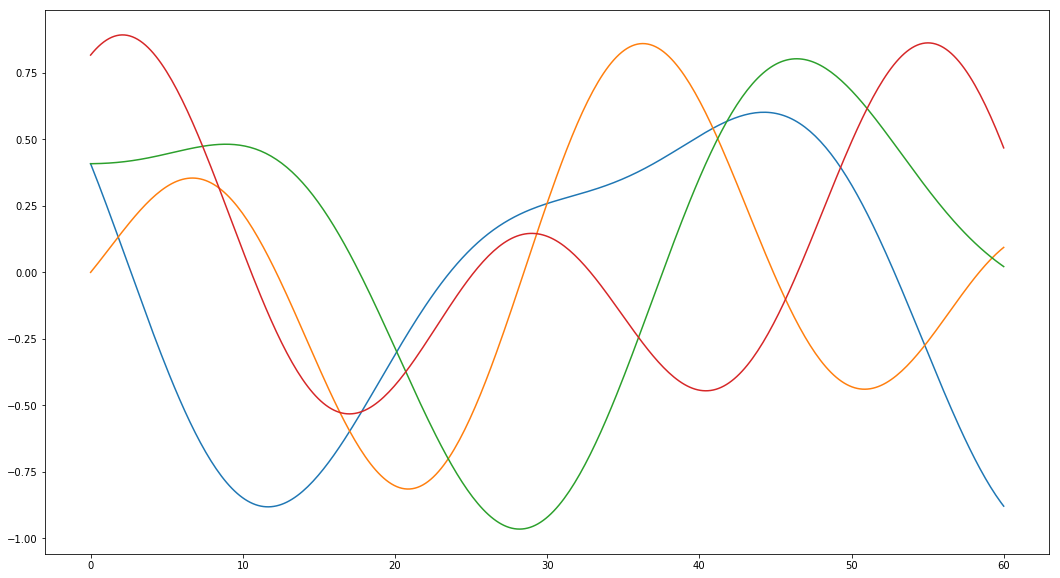

In [115]:
plt.plot(t, sol[:,0], t, sol[:,1], t, sol[:,2], t, sol[:,3])

In [95]:
R = transformations.euler_matrix(np.deg2rad(20), np.deg2rad(10), np.deg2rad(-10), axes='rzyx')

In [96]:
transformations.euler_from_matrix(R, axes='rzxz')

array([ 40.64234205,  35.53134776, -36.05238873])

# Quiz:2.8 

In [103]:
RNB = transformations.euler_matrix(np.deg2rad(10), np.deg2rad(20), np.deg2rad(30), axes='rzyx')
RNR = transformations.euler_matrix(np.deg2rad(-5),  np.deg2rad(5),   np.deg2rad(5), axes='rzyx')
RRB = np.dot(np.linalg.inv(RNR),RNB)
np.rad2deg(transformations.euler_from_matrix(RRB, axes='rzyx'))

array([ 13.22381821,  16.36834338,  23.61762825])

# ------------------------------------- 

In [24]:
from sympy import *

In [82]:
q1, q2, q3 = sympy.symbols('q1:4')

In [85]:
R1 = sympy.rot_axis2(q1)
R2 = sympy.rot_axis3(q2)
R3 = sympy.rot_axis2(q3)

In [86]:
(R1 * R2 * R3).T

Matrix([
[-sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3), -sin(q2)*cos(q3),  sin(q1)*cos(q2)*cos(q3) + sin(q3)*cos(q1)],
[                           sin(q2)*cos(q1),          cos(q2),                            sin(q1)*sin(q2)],
[-sin(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2),  sin(q2)*sin(q3), -sin(q1)*sin(q3)*cos(q2) + cos(q1)*cos(q3)]])

In [26]:
L, r = symbols('L r')

In [87]:
R1 = Matrix([[cos(q1), -sin(q1), 0, 0],
             [sin(q1),  cos(q1), 0, 0],
             [      0,        0, 1, 0],
             [      0,        0, 0, 1]])

In [88]:
trans = Matrix([[1, 0, 0, L],
                [0, 1, 0, 0],
                [0, 0, 1, r],
                [0, 0, 0, 1]])

In [89]:
q2 = (q1 * L)/r
R2 = Matrix([[1,       0,        0, 0],
             [0, cos(q2), -sin(q2), 0],
             [0, sin(q2),  cos(q2), 0],
             [0,       0,        0, 1]])

In [90]:
R = (R1 * trans * R2)

In [79]:
R[:3, :3] * Matrix([[2],[1],[1]])

Matrix([
[sin(q1)*sin(L*q1/r) - sin(q1)*cos(L*q1/r) + 2*cos(q1)],
[2*sin(q1) - sin(L*q1/r)*cos(q1) + cos(q1)*cos(L*q1/r)],
[                            sin(L*q1/r) + cos(L*q1/r)]])

In [92]:
R[:3, :3]

Matrix([
[cos(q1), -sin(q1)*cos(L*q1/r),  sin(q1)*sin(L*q1/r)],
[sin(q1),  cos(q1)*cos(L*q1/r), -sin(L*q1/r)*cos(q1)],
[      0,          sin(L*q1/r),          cos(L*q1/r)]])